## 导入库

In [15]:
!python -m pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import _pickle as pickle
import matplotlib.pyplot as plt
import time

# y.head()

## 导入训练集，将训练集的标签和数据分开

In [18]:
train = pd.read_csv("./train.csv")
X = train.iloc[:,1:]
y = train.iloc[:,0]
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X.count()  # 42000行数据

pixel0      42000
pixel1      42000
pixel2      42000
pixel3      42000
pixel4      42000
            ...  
pixel779    42000
pixel780    42000
pixel781    42000
pixel782    42000
pixel783    42000
Length: 784, dtype: int64

In [50]:
# X.iloc[:3]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


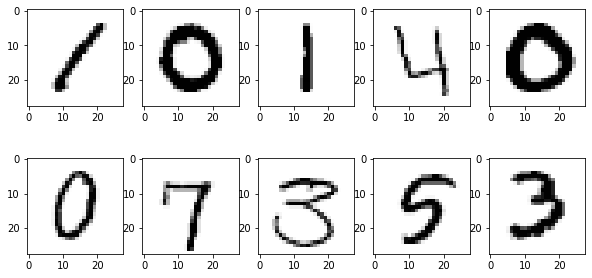

In [4]:
# 查看训练集的数字
plt.figure(figsize = (10,5))  #设置图片显示宽高

for num in range(0,10):
    plt.subplot(2,5,num+1)  #设置图片排列方式，和当前位置
    #将长度为784的向量数据转化为28*28的矩阵
    grid_data = X.iloc[num].values.reshape(28,28)
    #显示图片，颜色为黑白
    plt.imshow(grid_data, interpolation = "none", cmap = "Greys")

## 按照0.25的比例将训练集分为训练集和验证集，基于KNN算法训练数据

In [52]:
x,test_x,y,test_y = train_test_split(X,y,test_size=0.25,random_state=40)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)  
model.fit(x,y)
z=model.predict(test_x)
print('准确率：',np.sum(z==test_y)/z.size)

准确率： 0.9640952380952381


In [53]:
# model = KNeighborsClassifier(n_neighbors=2)
# model.fit(x,y)
# z=model.predict(test_x)
# print('准确率：',np.sum(z==test_y)/z.size)

In [38]:
# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(x,y)
# z=model.predict(test_x)
# print('准确率：',np.sum(z==test_y)/z.size)

准确率： 0.9631428571428572


In [39]:
# model = KNeighborsClassifier(n_neighbors=4)
# model.fit(x,y)
# z=model.predict(test_x)
# print('准确率：',np.sum(z==test_y)/z.size)

准确率： 0.9640952380952381


In [40]:
# model = KNeighborsClassifier(n_neighbors=5)
# model.fit(x,y)
# z=model.predict(test_x)
# print('准确率：',np.sum(z==test_y)/z.size)

准确率： 0.9638095238095238


In [41]:
# model = KNeighborsClassifier(n_neighbors=6)
# model.fit(x,y)
# z=model.predict(test_x)
# print('准确率：',np.sum(z==test_y)/z.size)

准确率： 0.9616190476190476


[0 7 1 3 4 1]


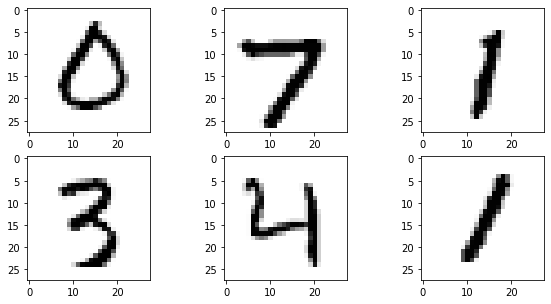

In [54]:
#学习后识别1660到1666六张图片并给出预测
print(model.predict(X[1660:1666]))
#实际的1660到1666代表的数
#显示1660到1666数字图片

plt.figure(figsize = (10,5))  #设置图片显示宽高

for num in range(1660,1666):
    plt.subplot(2,3,num-1660+1)  #设置图片排列方式，和当前位置
    #将长度为784的向量数据转化为28*28的矩阵
    grid_data = X.iloc[num].values.reshape(28,28)
    #显示图片，颜色为黑白
    plt.imshow(grid_data, interpolation = "none", cmap = "Greys")

In [71]:
test = pd.read_csv("./test.csv")
test.count() # 28000行数据
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
start = time.time()
val = model.predict(test)
end = time.time()
time = end-start
time

29.85969114303589

In [63]:
val[0:9]

array([2, 0, 9, 9, 3, 7, 0, 3, 0], dtype=int64)

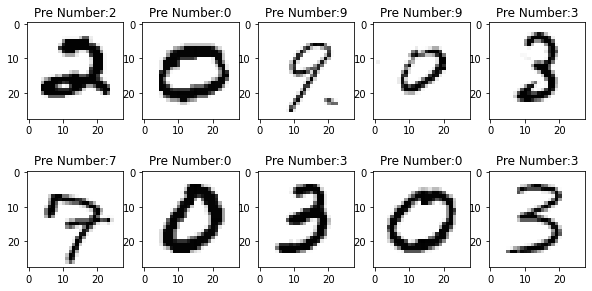

In [68]:
#测试集里的数字

plt.figure(figsize = (10,5))  #设置图片显示宽高

for num in range(0,10):
    plt.subplot(2,5,num+1)  #设置图片排列方式，和当前位置
    #将长度为784的向量数据转化为28*28的矩阵
    grid_data = test.iloc[num].values.reshape(28,28)
    #显示图片，颜色为黑白
    plt.imshow(grid_data, interpolation = "none", cmap = "Greys")
    plt.title('Pre Number:{}'.format(val[num]))

In [79]:
submission_df = pd.DataFrame({
                  "ImageId": range(1,len(test)+1),
                  "Label":val})
submission.to_csv("simplemnist_result.csv",index=False)
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
